# import library

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [2]:
train_data = pd.read_csv(r"C:\mnist_train.csv")
test_data = pd.read_csv(r"C:\mnist_train.csv")

In [3]:
train_data.shape

(60000, 785)

In [4]:
test_data.shape

(60000, 785)

In [5]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# cleaning data

In [7]:
train_data.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [8]:
test_data.isnull().sum().head(10)

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64

In [9]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,60000.0,0.002000,0.34660,0.0,0.0,0.0,0.0,62.0
28x25,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x26,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x27,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,60000.0,0.002000,0.34660,0.0,0.0,0.0,0.0,62.0
28x25,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x26,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
28x27,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [11]:
#About the dataset

#dimentions
print("Diemensions: ", test_data.shape, "\n")

#data types
print(test_data.info())

#head 
test_data.head()

Diemensions:  (60000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(train_data.columns)
print('-----------------------------------------------\n')
print(test_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
-----------------------------------------------

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [13]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# data analytics

<Axes: xlabel='label', ylabel='count'>

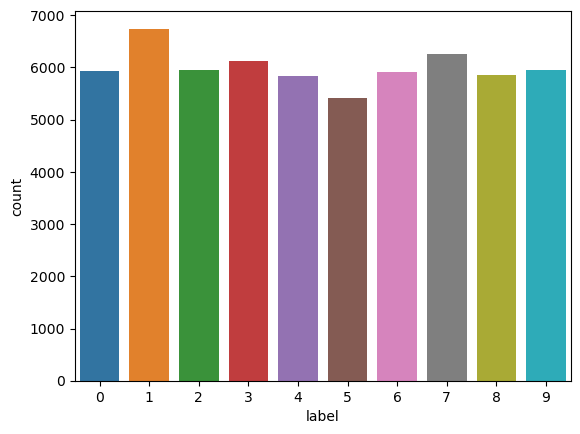

In [14]:
sns.countplot(x = train_data["label"])

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

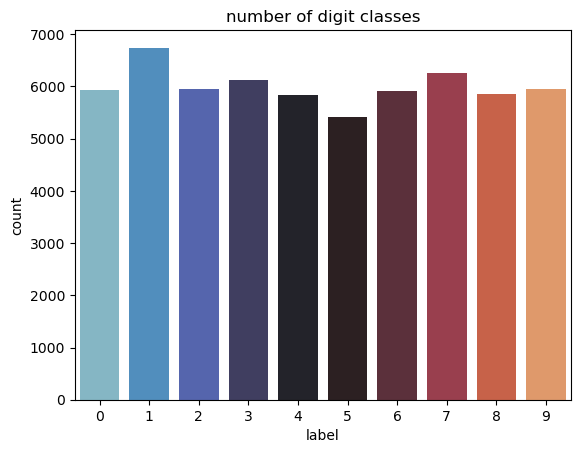

In [15]:
# vasualizing the number of class and count in the dataset
plt.plot(figure = (16,10))
g = sns.countplot(x = train_data["label"], palette = 'icefire')
plt.title('number of digit classes')
train_data.label.astype('category').value_counts()

In [16]:
print(g)

Axes(0.125,0.11;0.775x0.77)


(784,)


Text(0.5, 1.0, 'Digit 4')

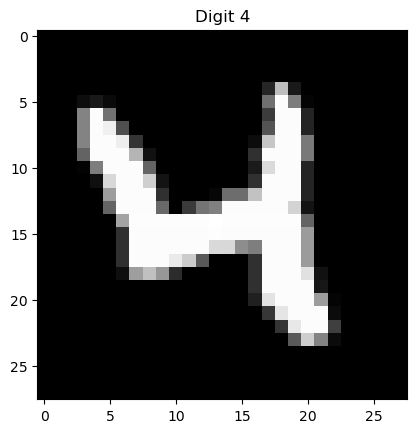

In [18]:
#plotting some samples as well as converting into matrix

four = train_data.iloc[20, 1:]
print(four.shape)
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [19]:
# average feature values 
round(train_data.drop('label', axis=1).mean(), 2)

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

# split data

In [20]:
#separating the x and y variable
y = train_data['label']

#dropping the variable 'label' from x variable
x = train_data.drop(columns = 'label')

# printing the size of data 
print(train_data.shape)


(60000, 785)


In [21]:
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [23]:
##normalization
x = x/255.0
test_data = test_data/255.0

print("x:", x.shape)
print("test_data:", test_data.shape)

x: (60000, 784)
test_data: (60000, 785)


In [24]:
#scaling the features 
from sklearn.preprocessing import scale 
x_scaled = scale(x)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3,random_state = 10, 
                                                   shuffle = True)

In [27]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

In [28]:
from sklearn import metrics
#accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9173333333333333 

